# Classificação de Roupas


## Imports

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np

import cv2

## Carregar o Dataset

In [ ]:
dataset = keras.datasets.fashion_mnist

In [ ]:
dataset.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

## OpenCV para deixar as imagens em escala de cinza, verificar.

In [ ]:
#imagens_treino = cv2.cvtColor(imagens_treino, cv2.COLOR_BGR2RGB)
#imagens_teste = cv2.cvtColor(imagens_treino, cv2.COLOR_RGB2GRAY)
#identificacoes_treino = cv2.cvtColor(identificacoes_treino, cv2.COLOR_RGB2GRAY)
#identificacoes_teste = cv2.cvtColor(identificacoes_teste, cv2.COLOR_RGB2GRAY)

In [ ]:
#imagens_treino = cv2.cvtColor(imagens_treino, cv2.COLOR_BGR2RGB)
#imagens_teste = cv2.cvtColor(imagens_treino, cv2.COLOR_BGR2RGB)
#identificacoes_treino = cv2.cvtColor(identificacoes_treino, cv2.COLOR_BGR2RGB)
#identificacoes_teste = cv2.cvtColor(identificacoes_teste, cv2.COLOR_BGR2RGB)

## Exploração de dados

In [ ]:
len(imagens_treino)
imagens_treino.shape

(60000, 28, 28)

In [ ]:
len(identificacoes_teste)
identificacoes_teste.shape


(10000,)

In [ ]:
identificacoes_treino.min()
identificacoes_treino.max()

9

## Exibir os Dados

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandalia', 'Camisa',
                           'Tenis', 'Bolsa', 'Bota']

Text(0.5, 1.0, '9')

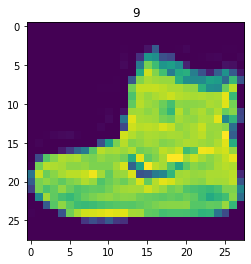

In [ ]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

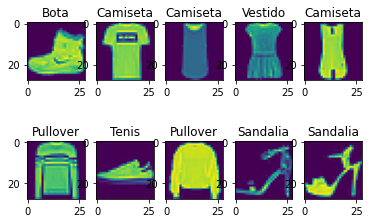

In [ ]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

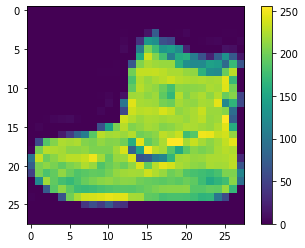

In [ ]:
plt.imshow(imagens_treino[0])
plt.colorbar()

## Normalização

In [ ]:
imagens_treino = imagens_treino/float(255)

## Criando, compilando, treinando e normalizando o modelo.

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

## Carregando e Salvando Modelo treinado.

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

## Mostrando todas as keys de history.

In [ ]:
historico.history['accuracy']

In [ ]:
# mostrando todas as keys de history
print(historico.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Visualizando gráfico de Acurácia de treino e validação por época.

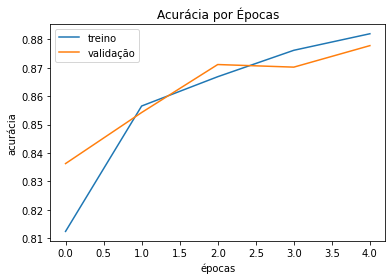

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history[ 'val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

## Visualizando gráfico de Acurácia de treino e validação por época.

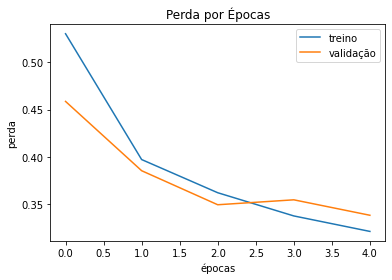

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history[ 'val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

## Testando o modelo e o modelo salvo.

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


## Avaliando o Modelo.

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 66.8963 - accuracy: 0.8505
Perda do teste: 66.89627838134766
Acurácia do teste: 0.8504999876022339
